In [12]:
#mengimpor library yang dibutuhkan
import numpy as np
import pandas as pd
import re
import nltk
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [13]:
#Data Collection
#mengimpor dataset dan menyimpan dalam dataframe
path = "..\Dataset\API_Kaggle\sentiment_analysis.csv"
corpus_df = pd.read_csv(path)
corpus_df

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook
2,2017,8,18,night,Don't angry me,negative,Facebook
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram
...,...,...,...,...,...,...,...
494,2015,10,18,night,"According to , a quarter of families under six...",negative,Twitter
495,2021,2,25,morning,the plan to not spend money is not going well,negative,Instagram
496,2022,5,30,noon,uploading all my bamboozle pictures of facebook,neutral,Facebook
497,2018,8,10,night,congratulations ! you guys finish a month ear...,positive,Twitter


In [14]:
#Data Preprocesing
nltk.download('stopwords')
wpt = nltk.WordPunctTokenizer()
stop_words = nltk. corpus. stopwords.words('english')

def normalize_document(doc):
#lower case and remove special characters/whitespaces
    doc = re.sub(r'[^a-zA-Z\s]','', doc, re.I|re.A)
    doc = doc. lower()
    doc = doc.strip()
    #tokenize dokumen
    tokens = wpt.tokenize(doc)
    #filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    #re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

corpus = np.array(corpus_df['text' ])
normalize_corpus = np.vectorize(normalize_document)
norm_corpus = normalize_corpus(corpus)
norm_corpus

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\santo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


array(['great day looks like dream', 'feel sorry miss sea beach',
       'dont angry',
       'attend class listening teachers reading slide nonsence',
       'want go let go', 'night feeling neutral',
       'feedings baby fun smiles coos', 'soooo high', '',
       'today first time arrive boat amazing journey',
       'love something like emc rules',
       'really really like song cardigan taylor swift',
       'sharpie running dangerously low ink',
       'want go music tonight lost voice', 'always somewhere miss',
       'dont distrube', 'dont care', 'ive sick past days',
       'im come back home past job really good time',
       'never fall love found', 'oh maya im sorry hope find soon',
       'playing kids amazing',
       'cleaning house family comming later today',
       'tried shtdown pc accenditenly click restart button really disgusting',
       'follow follow', 'amazing game playing everyday', 'im sorry',
       'im village hardly found internate feeling gloomy',
     

In [15]:
#Feature Weighting dengan TF-IDF
from sklearn. feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectors = vectorizer. fit_transform(norm_corpus)
feature_names = vectorizer.get_feature_names_out()
dense = vectors. todense ()
denselist = dense. tolist()
X = pd. DataFrame(denselist, columns=feature_names)
X

,aaaaaah,aaaaaw,aawww,accenditenly,accepts,according,account,achievement,act,actress,...,yesterday,yet,yor,youd,youll,youre,youtube,youve,yum,zero
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,0.0,0.0,0.0,0.0,0.0,0.421823,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
495,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
496,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
y = corpus_df['sentiment']
y.head()

0    positive
1    positive
2    negative
3    negative
4    negative
Name: sentiment, dtype: object

In [17]:
#Membagi dataset menjadi data latih dan data uji
#dengan perbandingan 70% : 30%
from sklearn.model_selection import train_test_split

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

print ("Ukuran X_trainset = ", X_trainset.shape)
print ("Ukuran y_trainset = ", y_trainset. shape)

print ("Ukuran X_testset = ", X_testset.shape)
print ("Ukuran y_testset = ", y_testset. shape)

Ukuran X_trainset =  (349, 1278)
Ukuran y_trainset =  (349,)
Ukuran X_testset =  (150, 1278)
Ukuran y_testset =  (150,)


DecisionTrees's Metrics: 
               precision    recall  f1-score   support

    negative     0.5484    0.4250    0.4789        40
     neutral     0.5581    0.7869    0.6531        61
    positive     0.8182    0.5510    0.6585        49

    accuracy                         0.6133       150
   macro avg     0.6416    0.5876    0.5968       150
weighted avg     0.6405    0.6133    0.6084       150



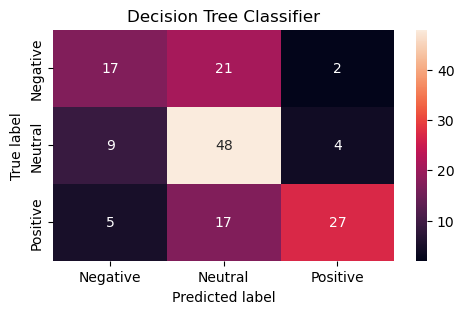

In [18]:
#Data Classification
#Membangun model klasifikasi dengan Decision Tree
SentimentTree = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None,
    min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
    max_features=None, random_state=None, max_leaf_nodes=None,
    min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0,
    monotonic_cst=None)

#Melatih model dengan data latih
SentimentTree.fit(X_trainset,y_trainset)

#Memprediksi data uji dengan model
y_predSentiment = SentimentTree.predict(X_testset)

#Menghitung nilai akurasi prediksi model
from sklearn import metrics
print("DecisionTrees's Metrics: \n", metrics.classification_report(y_testset, y_predSentiment, digits=4))

#Membuat Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

confusionMatrix = metrics.confusion_matrix(y_testset, y_predSentiment)

#Mengubah ke bentuk dataframe untuk memudahkan plotting
dfconfusionMatrix = pd.DataFrame(confusionMatrix,
index = ['Negative', 'Neutral','Positive'],
columns = ['Negative','Neutral','Positive' ])

#Membuat tampilan plot
plt.figure(figsize=(5.5,3))
sns.heatmap(dfconfusionMatrix, annot=True)
plt.title('Decision Tree Classifier')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

K-Nearest Neighbors Metrics: 
               precision    recall  f1-score   support

    negative     1.0000    0.0250    0.0488        40
     neutral     0.4207    1.0000    0.5922        61
    positive     1.0000    0.0816    0.1509        49

    accuracy                         0.4400       150
   macro avg     0.8069    0.3689    0.2640       150
weighted avg     0.7644    0.4400    0.3032       150



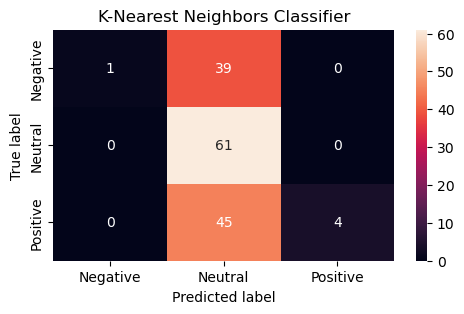

In [19]:
#Melatih model dengan data latih

#Data Classification
#Membangun model klasifikasi dengan K-Nearest Neighbors
SentimentTree = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto',
    leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

SentimentTree.fit(X_trainset,y_trainset)

#Memprediksi data uji dengan model
y_predSentiment = SentimentTree.predict(X_testset)

#Menghitung nilai akurasi prediksi model
from sklearn import metrics
print("K-Nearest Neighbors Metrics: \n", metrics.classification_report(y_testset, y_predSentiment, digits=4))

#Membuat Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

confusionMatrix = metrics.confusion_matrix(y_testset, y_predSentiment)

#Mengubah ke bentuk dataframe untuk memudahkan plotting
dfconfusionMatrix = pd.DataFrame(confusionMatrix,
    index = ['Negative', 'Neutral','Positive'],
    columns = ['Negative','Neutral','Positive' ])

#Membuat tampilan plot
plt.figure(figsize=(5.5,3))
sns.heatmap(dfconfusionMatrix, annot=True)
plt.title('K-Nearest Neighbors Classifier')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Complement Naïve Bayes Metrics: 
               precision    recall  f1-score   support

    negative     0.5319    0.6250    0.5747        40
     neutral     0.7119    0.6885    0.7000        61
    positive     0.8182    0.7347    0.7742        49

    accuracy                         0.6867       150
   macro avg     0.6873    0.6827    0.6830       150
weighted avg     0.6986    0.6867    0.6908       150



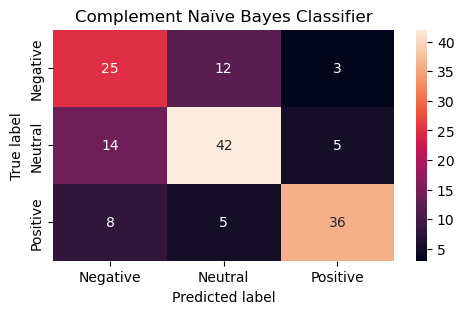

In [20]:
#Data Classification
#Membangun model klasifikasi dengan Complement Naïve Bayes
SentimentTree = ComplementNB(alpha=1.0, force_alpha=True, fit_prior=True, class_prior=None, norm=False)

#Melatih model dengan data latih
SentimentTree.fit(X_trainset,y_trainset)

#Memprediksi data uji dengan model
y_predSentiment = SentimentTree.predict(X_testset)

#Menghitung nilai akurasi prediksi model
from sklearn import metrics
print("Complement Naïve Bayes Metrics: \n", metrics.classification_report(y_testset, y_predSentiment, digits=4))

#Membuat Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

confusionMatrix = metrics.confusion_matrix(y_testset, y_predSentiment)

#Mengubah ke bentuk dataframe untuk memudahkan plotting
dfconfusionMatrix = pd.DataFrame(confusionMatrix,
index = ['Negative', 'Neutral','Positive' ],
columns = ['Negative','Neutral','Positive' ])

#Membuat tampilan plot
plt.figure(figsize=(5.5,3))
sns.heatmap(dfconfusionMatrix, annot=True)
plt.title('Complement Naïve Bayes Classifier')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

MLP Classifier Metrics: 
               precision    recall  f1-score   support

    negative     0.7391    0.4250    0.5397        40
     neutral     0.5761    0.8689    0.6928        61
    positive     0.8571    0.6122    0.7143        49

    accuracy                         0.6667       150
   macro avg     0.7241    0.6354    0.6489       150
weighted avg     0.7114    0.6667    0.6590       150



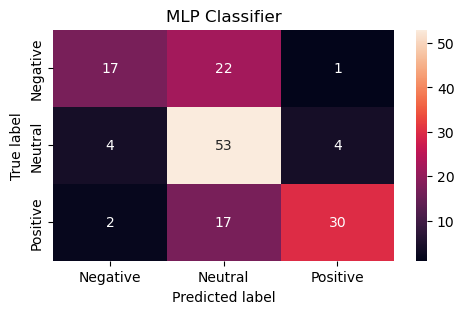

In [22]:
#Data Classification
#Membangun model klasifikasi dengan MLP Classifier
SentimentTree = MLPClassifier(hidden_layer_sizes=(100,), activation='relu',
solver='adam', alpha=0.0001, batch_size='auto',
learning_rate='constant', learning_rate_init=0.001,
power_t=0.5, max_iter=200, shuffle=True, random_state=None,
tol=0.0001, verbose=False, warm_start=False, momentum=0.9,
nesterovs_momentum=True, early_stopping=False,
validation_fraction=0.1, beta_1=0.9, beta_2=0.999,
epsilon=1e-08, n_iter_no_change=10, max_fun=15000)

#Melatih model dengan data latih
SentimentTree.fit(X_trainset,y_trainset)

#Memprediksi data uji dengan model
y_predSentiment = SentimentTree.predict(X_testset)

#Menghitung nilai akurasi prediksi model
from sklearn import metrics
print("MLP Classifier Metrics: \n", metrics.classification_report(y_testset, y_predSentiment, digits=4))
#Membuat Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

confusionMatrix = metrics.confusion_matrix(y_testset, y_predSentiment)

#Mengubah ke bentuk dataframe untuk memudahkan plotting
dfconfusionMatrix = pd.DataFrame(confusionMatrix,
index = ['Negative','Neutral','Positive'],
columns = ['Negative','Neutral','Positive' ])

#Membuat tampilan plot
plt.figure(figsize=(5.5,3))
sns.heatmap(dfconfusionMatrix, annot=True)
plt.title('MLP Classifier')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Support Vector Classifier Metrics: 
               precision    recall  f1-score   support

    negative     0.8333    0.2500    0.3846        40
     neutral     0.5278    0.9344    0.6746        61
    positive     0.9000    0.5510    0.6835        49

    accuracy                         0.6267       150
   macro avg     0.7537    0.5785    0.5809       150
weighted avg     0.7309    0.6267    0.6002       150



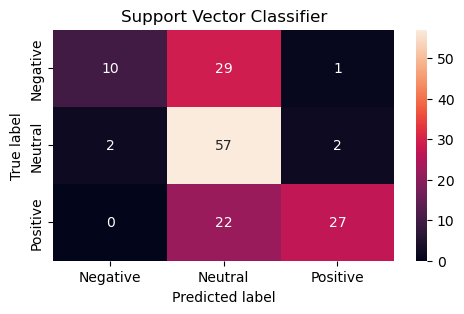

In [23]:
#Data Classification
#Membangun model klasifikasi dengan Support Vector Classifier
SentimentTree = SVC(C=1.0, kernel='rbf', degree=3, gamma='scale',
coef0=0.0, shrinking=True, probability=False,
tol=0.001, cache_size=200, class_weight=None,
verbose=False, max_iter =- 1, decision_function_shape='ovr',
break_ties=False, random_state=None)

#Melatih model dengan data latih
SentimentTree.fit(X_trainset,y_trainset)

#Memprediksi data uji dengan model
y_predSentiment = SentimentTree.predict(X_testset)

#Menghitung nilai akurasi prediksi model
from sklearn import metrics
print("Support Vector Classifier Metrics: \n", metrics.classification_report(y_testset, y_predSentiment, digits=4))

#Membuat Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

confusionMatrix = metrics.confusion_matrix(y_testset, y_predSentiment)

#Mengubah ke bentuk dataframe untuk memudahkan plotting
dfconfusionMatrix = pd.DataFrame(confusionMatrix,
index = ['Negative','Neutral','Positive'],
columns = ['Negative','Neutral','Positive' ])

#Membuat tampilan plot
plt.figure(figsize=(5.5,3))
sns.heatmap(dfconfusionMatrix, annot=True)
plt.title('Support Vector Classifier')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()